In [2]:
import pandas as pd
import numpy as np
import exploration
import preprocessing
import modeling

In [3]:
#reading data
path = "credit-data.csv"
df = exploration.read_data(path, index_col = "PersonID")

In [4]:
#imputating holes
preprocessing.data_imputation(df, "mean", ["MonthlyIncome"])
preprocessing.data_imputation(df, "mean", ["NumberOfDependents"])

In [5]:
#discretizing variables of interest
preprocessing.discretize(df, "age", size = 5, bound = (22, 80), method = "cut")
preprocessing.discretize(df, "DebtRatio", bins_no = 4, method = "qcut")

In [7]:
#generate dummy
dummy_comluns1 = pd.get_dummies(df["discretized_DebtRatio"], prefix = "discretized_DebtRatio")
dummy_comluns2 = pd.get_dummies(df["discretized_age"], prefix = "discretized_age")
df = pd.concat([df, dummy_comluns1, dummy_comluns2], axis = 1)

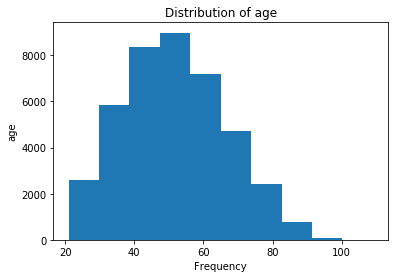

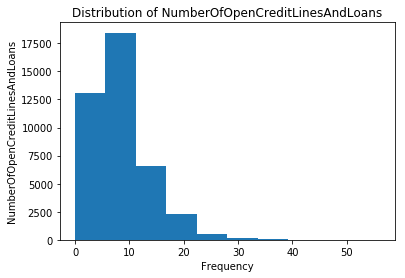

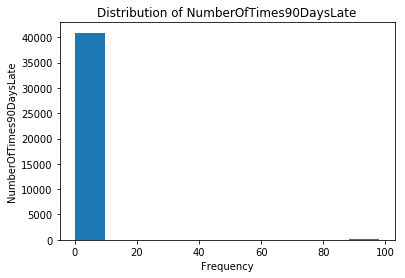

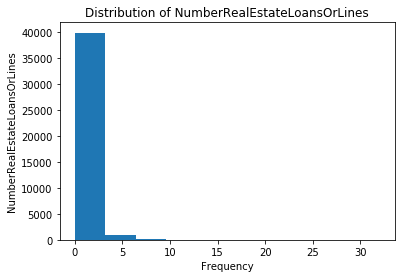

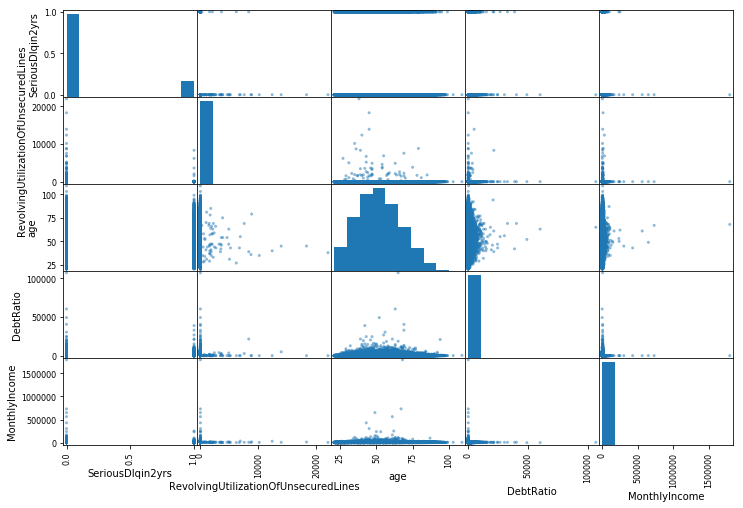

Correlations between SeriousDlqin2yrs and other variables
age                                       -0.173728
discretized_age_(67.0, 72.0]              -0.068078
discretized_age_(67.0, 72.0]              -0.068078
discretized_age_(62.0, 67.0]              -0.065851
discretized_age_(62.0, 67.0]              -0.065851
discretized_age_(72.0, 77.0]              -0.063569
discretized_age_(72.0, 77.0]              -0.063569
discretized_age_(80.0, 109.0]             -0.049852
discretized_age_(80.0, 109.0]             -0.049852
zipcode                                   -0.045051
NumberOfOpenCreditLinesAndLoans           -0.039898
discretized_age_(77.0, 80.0]              -0.039673
discretized_age_(77.0, 80.0]              -0.039673
discretized_age_(57.0, 62.0]              -0.038332
discretized_age_(57.0, 62.0]              -0.038332
discretized_DebtRatio_(0.176, 0.37]       -0.033823
discretized_DebtRatio_(0.176, 0.37]       -0.033823
MonthlyIncome                             -0.029876
discre

In [8]:
#exploration
vars = ["age", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", \
"NumberRealEstateLoansOrLines"]
for var in vars:
    exploration.plot_hist(df, var, 10)

exploration.plot_scatter_matrix(df, ["SeriousDlqin2yrs", \
"RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome"])
exploration.corr_matrix(df, "SeriousDlqin2yrs")

In [9]:
#modeling
x_train, x_test, y_train, y_test = modeling.split(df, \
"SeriousDlqin2yrs", ["age", "DebtRatio", "SeriousDlqin2yrs", "discretized_age", "discretized_DebtRatio"], test_size = 0.3)

modeling.build_dec_tree(x_train, x_test, y_train, y_test)

Depth: 1 | Train acc: 0.87 | Test acc: 0.87
Depth: 3 | Train acc: 0.87 | Test acc: 0.87
Depth: 5 | Train acc: 0.88 | Test acc: 0.87
Depth: 7 | Train acc: 0.88 | Test acc: 0.87
